<a href="https://colab.research.google.com/github/DyatlovaA/cv-tf/blob/main/IoT_2_230425_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Кластеризация

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs, make_circles
import skfuzzy as fuzz
import itertools

In [3]:
X,y = make_blobs(n_samples = 500, n_features = 3, centers=3, cluster_std= 1.7,random_state=15)

In [4]:
def create3D_plot(title, labels, labels_title="Кластер",legend=False):

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50, edgecolor='k')

  ax.set_title(title, fontsize=14)
  ax.set_xlabel("Признак 1")
  ax.set_ylabel("Признак 2")
  ax.set_zlabel("Признак 3")
  if(legend):  plt.colorbar(scatter, label=labels_title)
  plt.show()

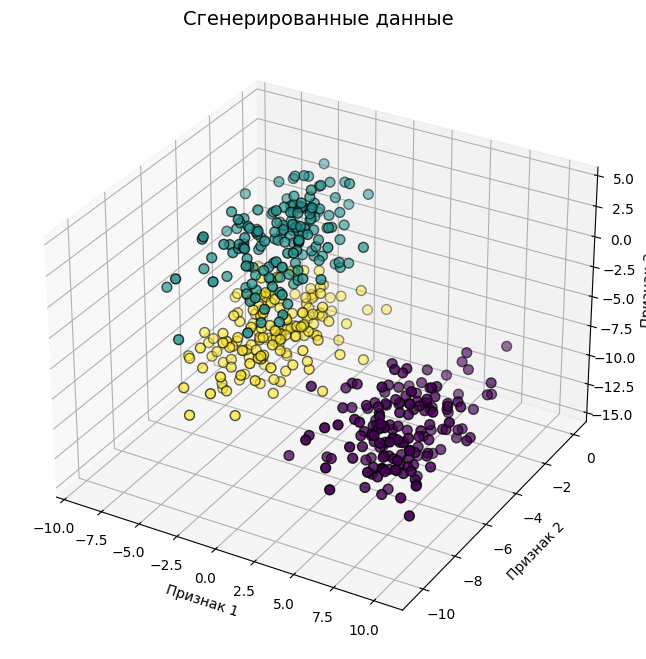

In [5]:
create3D_plot('Сгенерированные данные', y)

#Агломеративная иерархическая кластеризация

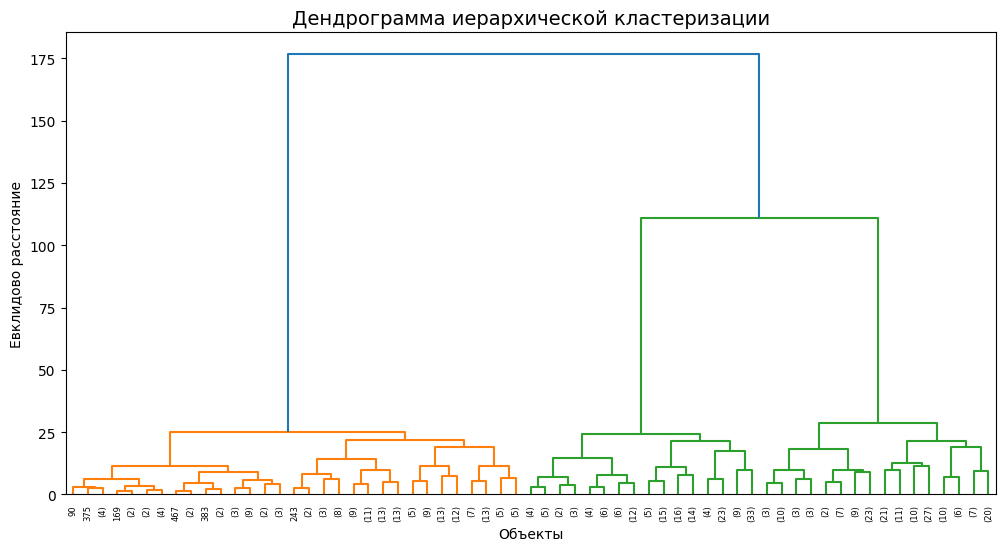

In [6]:
ACmodel = AgglomerativeClustering(n_clusters=3, linkage='ward') # Метод Уорда для минимизации внутрикластерной дисперсии
AC_labels = ACmodel.fit_predict(X)

# Построение дендрограммы
plt.figure(figsize=(12, 6))
ACmodel_D = linkage(X, method='ward')
dendrogram(ACmodel_D, truncate_mode='level', p=5, color_threshold=0.7 * max(ACmodel_D[:, 2]))
plt.title("Дендрограмма иерархической кластеризации", fontsize=14)
plt.xlabel("Объекты")
plt.ylabel("Евклидово расстояние")
plt.show()

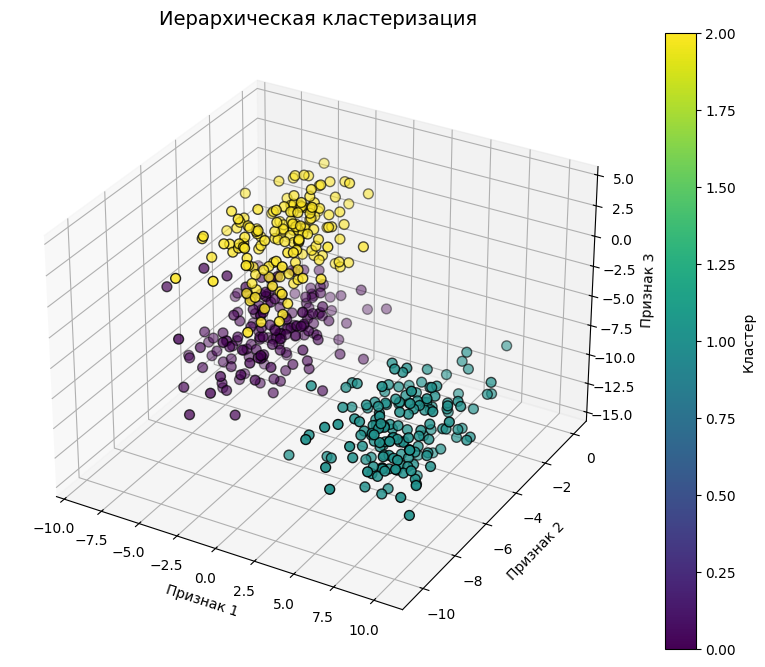

In [7]:
create3D_plot('Иерархическая кластеризация', AC_labels, "Кластер",True)

#Алгоритм K-Means

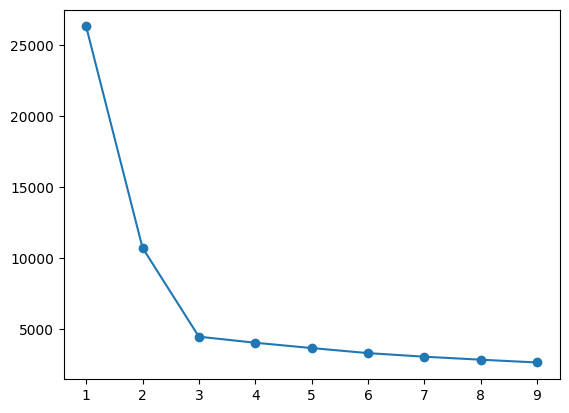

In [8]:
k_range= range (1,10)
ssr = []
for k in k_range:
  model = KMeans(n_clusters=k, n_init=10)
  model.fit(X)
  ssr.append(model.inertia_) # Сохраняем значение инерции для текущего количества кластеров

plt.plot(k_range, ssr, '-o')
plt.xticks(k_range)
plt.show()

In [9]:
K_model = KMeans(n_clusters=3, n_init=10)
K_labels=K_model.fit_predict(X)

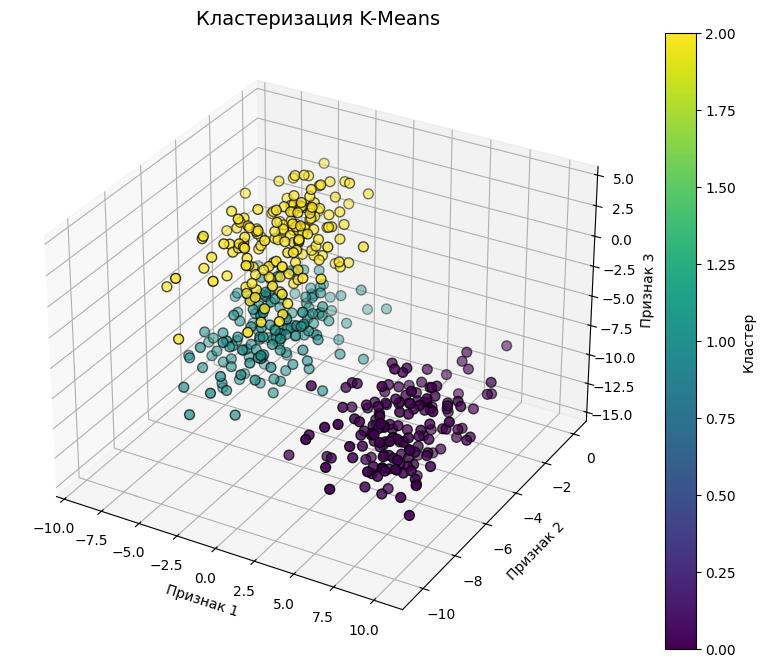

In [10]:
create3D_plot('Кластеризация K-Means', K_labels,legend=True)

#DBSCAN

In [11]:
dbs=DBSCAN(eps=0.2, min_samples=5)
dbs_labels=dbs.fit_predict(X)

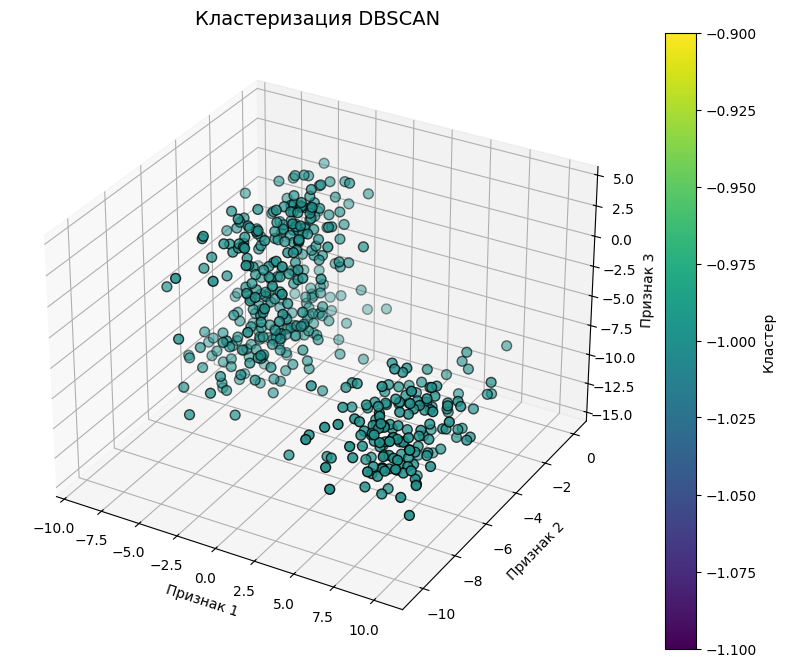

In [12]:
create3D_plot('Кластеризация DBSCAN', dbs_labels,legend=True)

In [13]:
dbs=DBSCAN(eps=0.5, min_samples=35)
dbs_labels=dbs.fit_predict(X)

In [14]:
def getEpsil(data):
  n_sam = np.arange(2,40,step=3)
  epsil = np.linspace(0.01, 3, num=30)
  combinations=list(itertools.product(epsil, n_sam)) # Генерируем все возможные комбинации

  best_metric = -1  # Лучший silhouette_score (изначально -1, так как метрика всегда >= -1)
  ep = 0           # Лучшее значение eps
  ns = 0           # Лучшее значение min_samples

  for i, (epsi,n_sample) in enumerate (combinations):
    dbsc = DBSCAN(eps=epsi, min_samples=n_sample)
    dbsc.fit(data)
    labels=dbsc.labels_
    labels_set=set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
     num_clusters -=1
    if (num_clusters <2) or (num_clusters>50):
     continue

    score=silhouette_score(data, labels)
    if (score>best_metric):
     best_metric=score
     ep=epsi
     ns=n_sample
     print('best', score, ep, ns)
  return ep,ns

best -0.3911356630128805 0.11310344827586206 2
best -0.36323556497465886 0.5255172413793103 5
best -0.1714033424384947 0.8348275862068966 2
best -0.14899334977113357 1.0410344827586206 2
best 0.022065200174939414 1.0410344827586206 5
best 0.21299249286428074 1.1441379310344828 5
best 0.26735094575430934 1.3503448275862069 5
best 0.2862757290037069 1.3503448275862069 8
best 0.3224048714744027 1.453448275862069 5
best 0.35656547871620103 1.453448275862069 8
best 0.4819695632392281 1.556551724137931 5
best 0.49100749079359773 1.7627586206896553 8
best 0.4911209549617887 1.8658620689655172 11
best 0.5269017461562389 1.9689655172413794 11
best 0.5341361119114995 2.175172413793103 14
best 0.5428554159223832 2.2782758620689654 17
best 0.5459231290578148 2.3813793103448275 20
best 0.549830811516663 2.4844827586206897 2
best 0.5543109038181813 2.6906896551724135 26


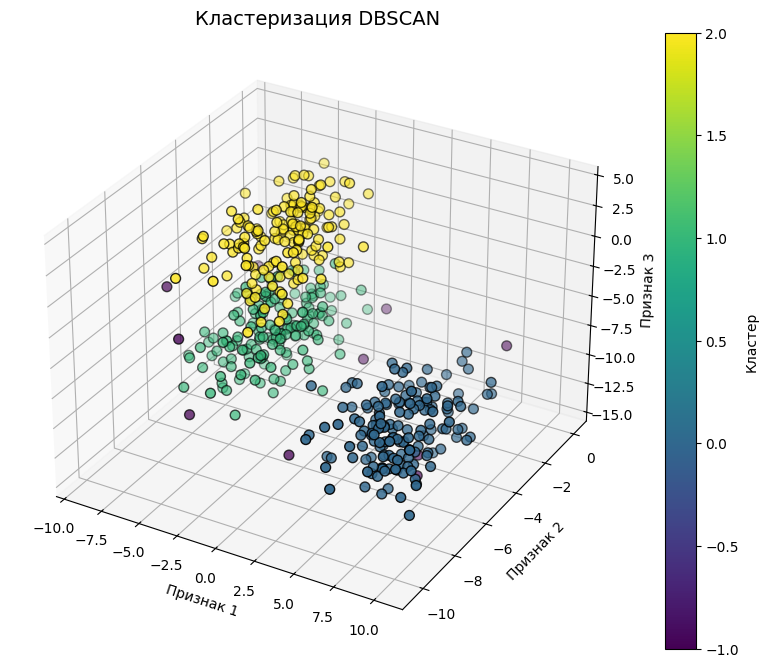

In [15]:
ep,ns = getEpsil(X)
dbs=DBSCAN(eps=ep, min_samples=ns)
dbs_labels=dbs.fit_predict(X)
create3D_plot('Кластеризация DBSCAN', dbs_labels,legend=True)

#Алгоритм Fuzzy C

In [16]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3,3,error = 0.005, maxiter=1000, init=None)

clust_max=np.argmax(u, axis=0)

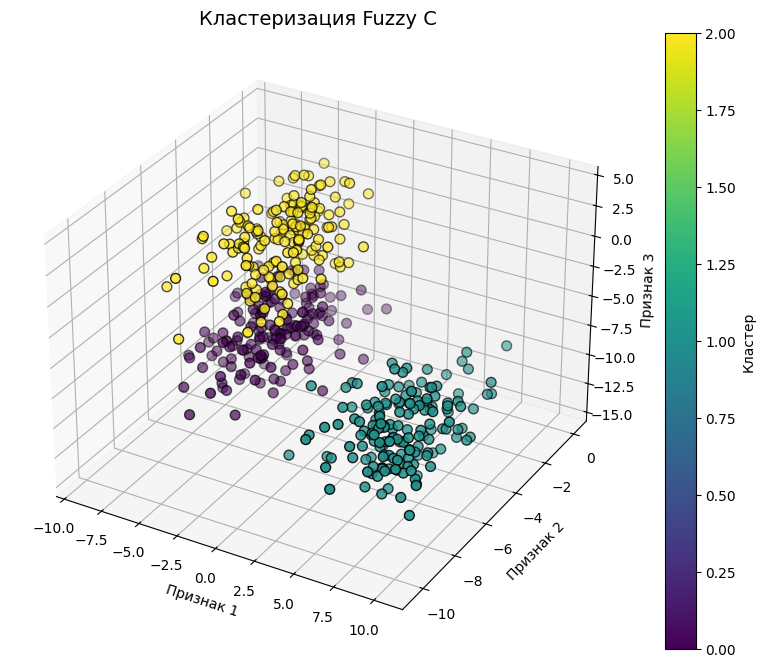

In [17]:
create3D_plot('Кластеризация Fuzzy C', clust_max,legend=True)

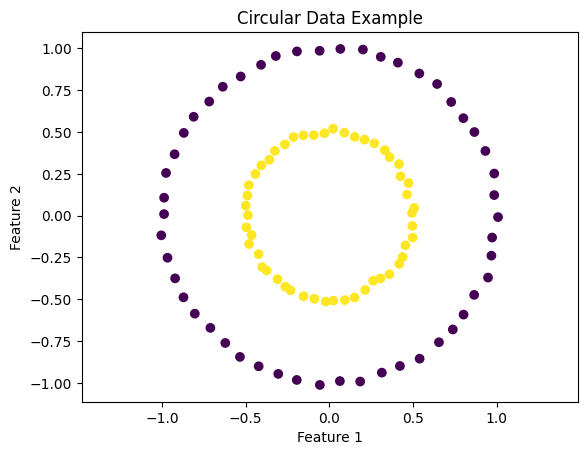

In [18]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate circular data
X, y = make_circles(n_samples=100, noise=0.01, factor=0.5, random_state=15)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Circular Data Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

In [19]:
K_model = KMeans(n_clusters=2, n_init=10)
K_labels=K_model.fit_predict(X)



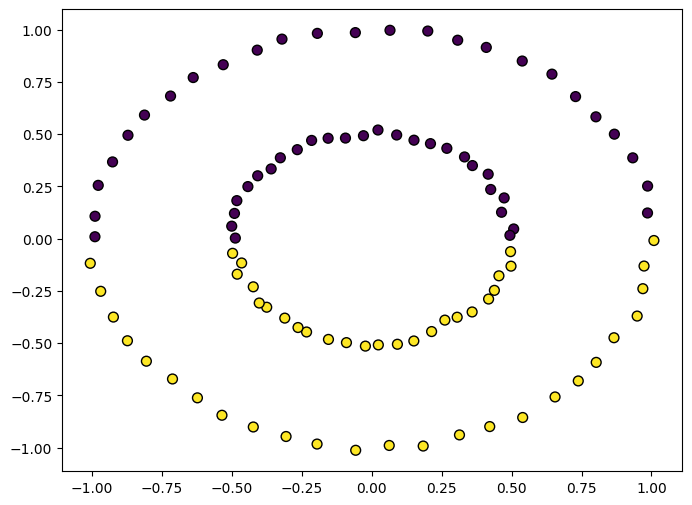

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1] , c = K_labels, cmap='viridis', marker='o', edgecolor='k',s=50)
plt.show()

In [21]:
dbs=DBSCAN(eps=0.25, min_samples=2)
dbs_labels=dbs.fit_predict(X)

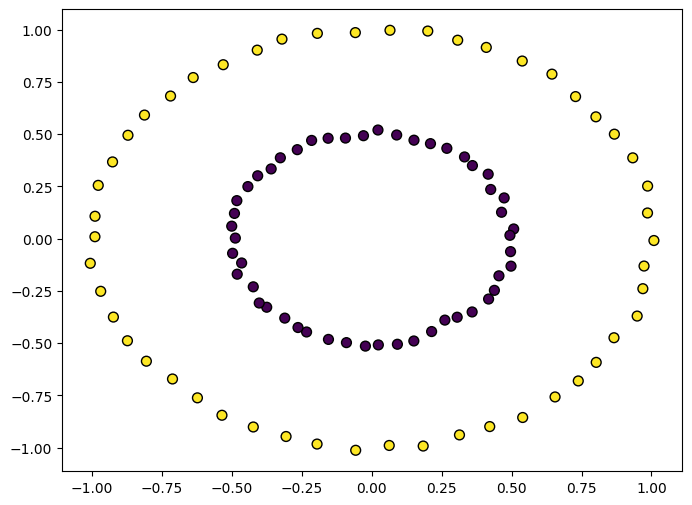

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1] , c = dbs_labels, cmap='viridis', marker='o', edgecolor='k',s=50)
plt.show()

In [23]:
print(silhouette_score(X,K_labels))

0.34342537422945524


In [24]:
print(silhouette_score(X,dbs_labels))

0.1033146433814864


In [25]:
print(davies_bouldin_score(X,K_labels))

1.1813543711643166


In [26]:
print(davies_bouldin_score(X, dbs_labels))

550.5528792117693


#Классификация

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification,  make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV

In [28]:
X, y = make_classification(n_samples = 1000, n_features=10, n_informative=5, n_redundant=1, n_classes = 3, random_state=15)

In [29]:
class_name=['Class 1', 'Class 2', 'Class 3']
feature_name = ['Feature {i}' for i in range (1,11)]

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=15)

#KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [32]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.795


#Дерево решений

In [33]:
dtc=DecisionTreeClassifier(random_state=15)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)

In [34]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.715


In [35]:
feature_importances = pd.DataFrame({"Признак": feature_name,
                                    "Важность": dtc.feature_importances_
                                    }).sort_values(by="Важность", ascending=False)

print(feature_importances)

       Признак  Важность
1  Feature {i}  0.291459
4  Feature {i}  0.180053
9  Feature {i}  0.131013
0  Feature {i}  0.100085
6  Feature {i}  0.096169
2  Feature {i}  0.079359
5  Feature {i}  0.051144
7  Feature {i}  0.029755
8  Feature {i}  0.023018
3  Feature {i}  0.017944


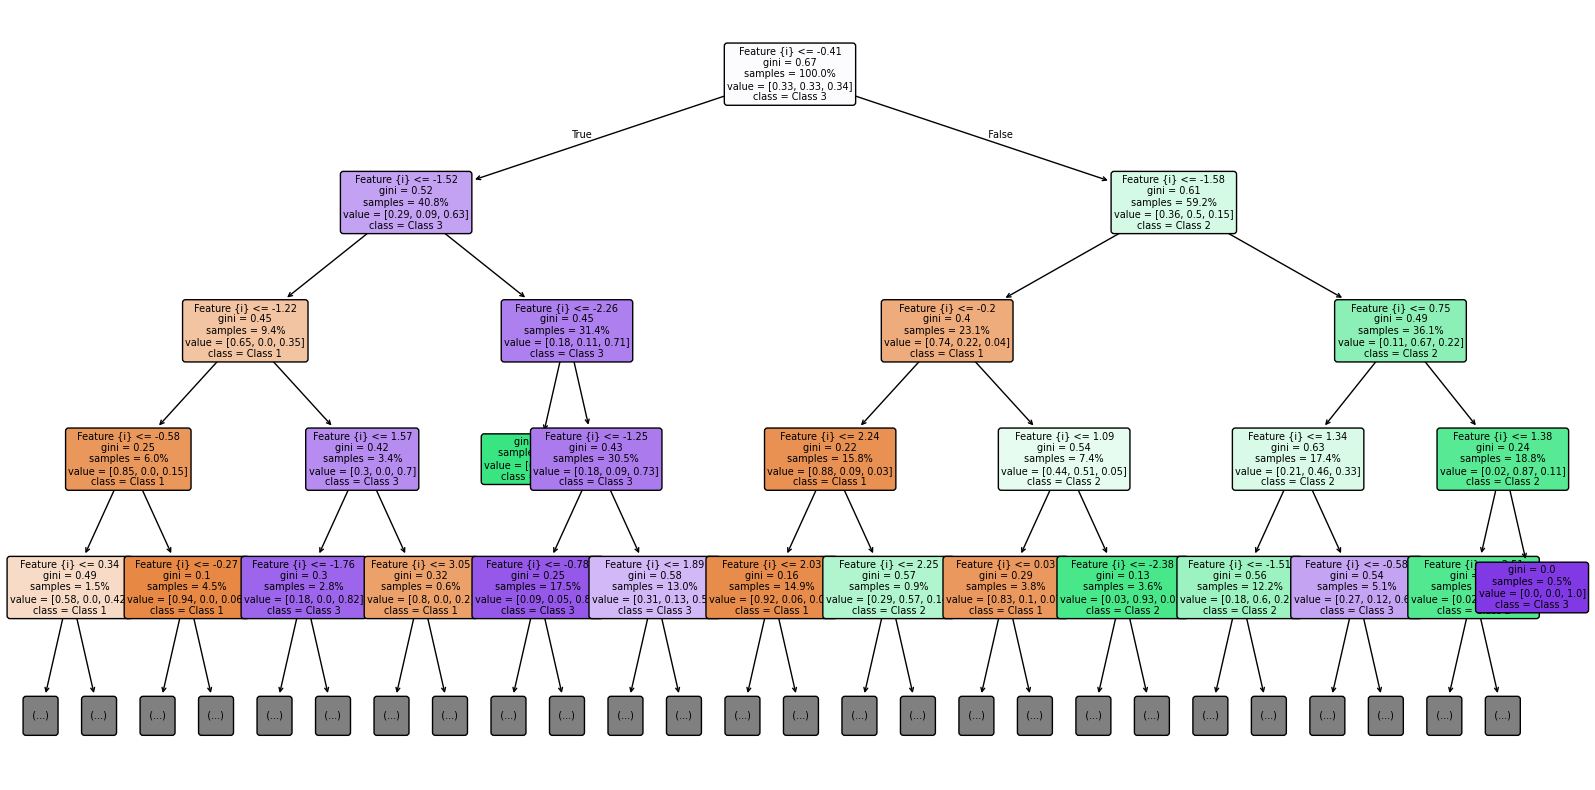

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=feature_name, class_names=class_name,
          max_depth=4,
          impurity=True,
          filled=True,
          rounded=True,
          proportion=True,
          precision=2,
          fontsize=7)
plt.show()

# Метод опорных векторов

In [37]:
svc = SVC(kernel = 'rbf', random_state = 15)

In [38]:
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.845

Для домашки

1.   Сделать 3 ансамбля (bagging, boosting, stacking)
2.   Вывести показания Acc, BA, F1,F2
3.   Победить GradientBoostiing

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score, fbeta_score, accuracy_score, f1_score
gradBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=15)

gradBoost.fit(X_train, y_train)
y_pred=gradBoost.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(fbeta_score(y_test,y_pred,beta=2,average='weighted'))
print(balanced_accuracy_score(y_test,y_pred))

0.79
0.7909411367852925
0.7900207901740625
0.7900291917533298


In [42]:
from sklearn.metrics import balanced_accuracy_score, fbeta_score, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier, StackingClassifier,GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier